# Experiments with Random Factors
## Accounting for a New Source of Variation
### Dr Austin R Brown
### School of Data Science and Analytics
#### Kennesaw State University

In [65]:
import os
# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#   print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Experiments with Random Factors"
#os.chdir(today_dir)
#print(f"📂 Changed directory to: {os.getcwd()}")

## Introduction

- Throughout this course, we have discussed various experimental designs and methods for analyzing data from these designs.

- In general, they all have similar characteristics: we have a response variable that is measured quantitatively and we have one or more categorical factors that we are interested in comparing and/or controlling for.

- In these designs, we've made a pretty big and unspoken assumption: we are interested in comparing the means of the response variable across the **specific** levels of the categorical factors.

    - In other words, our categorical factors have been considered **fixed**.

- In this module, we will discuss a different type of categorical factor: **random** factors.

- What in the world is a random factor? Let's dive in!

## Random Factors: A Definition

- A random factor is a categorical factor whose specific value is not necessarily of interest to the experimenter.

- For example, suppose we wanted to compare mean math scores of students in different schools.

- We might be interested in the mean math scores of students in **all** schools, but we don't care about the specific schools we sampled from.

    - We just want to know if there is a difference in mean math scores between schools and these schools were (in theory) chosen at random from the larger population of all schools to be included in the experiment.

- To account for potential sources of variation in the schools, we might want to include the school as a random factor in our analysis.

- Let's say we sampled 5 schools and within each school, we sampled 10 8th grade students. We collected their math scores on a state standardized test. The results are contained in `math_scores.xlsx`.

- To reiterate, a random factor is a categorical factor whose specific levels are not of interest to the experimenter, but rather the variability among the levels is of interest.

## One-Factor Random Factor Model

- Before we dig into the data, we need to consider how the ultimate analytical tools we will use differ from what we have used in the past.

- In this particular case, we have one categorical and random factor (school) and one continuous response variable (math score).

- As you might have guessed, the descriptive analyses don't really change from what we did in a one-factor CRD.

    - What about the inferential analyses?

- In a one-factor CRD, we used one-way ANOVA to test for differences in the means of the response variable across the levels of the categorical factor.

- We use a very similar model here, but one that accounts for two sources of randomness: from the random factor and from the error term:

$$ y_{ij} = \mu + a_i + \epsilon_{ij} $$

where:

- $y_{ij}$ = the $j^{th}$ observation from the $i^{th}$ level of the random factor, 
- $\mu$ = the overall mean, 
- $a_i$ = the random effect of the $i^{th}$ level of the random factor, and 
- $\epsilon_{ij}$ = the error term.

- Note that:

$$\begin{align*} a_i &\sim N(0, \sigma_a^2) \\ \epsilon_{ij} &\sim N(0, \sigma^2) \end{align*} $$

- Further, remember from before and from regression that $MSE$ is an unbiased estimator of $\sigma^2$, i.e.,

$$ E[MSE] = \sigma^2 $$

- $MSA$, which is the mean square for the random factor, has the expected value of:

$$ E[MSA] = \sigma^2 + r \sigma_a^2 $$

- Here, $r$ is the number of observations per level of the random factor.

- Just like with the fixed-effects one-way ANOVA model, our F-statistic was the ratio of $MSA$ to $MSE$. Here, if the teachers have no effect on the students' math scores (e.g., $\sigma^2_a = 0$), we would expect that:

$$ F_{\text{Stat}} = \frac{MSA}{MSE} = \frac{\sigma^2 + r \sigma_a^2}{\sigma^2} = 1 $$

- If the teachers do have an effect on the students' math scores (e.g., $\sigma^2_a > 0$), we would expect that:

$$ F_{\text{Stat}} = \frac{MSA}{MSE} = \frac{\sigma^2 + r \sigma_a^2}{\sigma^2} > 1 $$

- This leads us to our statistical hypotheses:

$$ \begin{align*} &H_0: \sigma^2_a = 0 \\ 
                  &H_1: \sigma^2_a > 0 
   \end{align*}
   $$

- We can use the F-statistic to test these hypotheses, in a similar manner to what we did with the one-way ANOVA model.

- This is well and good! But let's take a step back and think about how we would go about estimating $\sigma^2_a$.

    - This will help us as we work through the analysis.

- Assuming we have $I$ levels of the random factor, we can estimate $\sigma^2_a$ using the following formula:

$$ \begin{align*} 
\hat{\sigma}^2_a &= \frac{MSA - MSE}{r} \\ 
MSA &= \frac{\sum_{i=1}^I r_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot})^2}{I-1} \\
MSE &= \frac{\sum_{i=1}^I(r_i-1)s_i^2}{N-I} 
\end{align*}
$$

- If $MSA = MSE$, then this suggests that the between group variation (i.e., the differences between group means and the grand mean) is equal to the within group variation (i.e., the differences between group means and the mean of the observations within each group).

- If we go back to the fundamental ANOVA identity, ($SST = SSA + SSE$), the above case would generally suggest that $SSA \approx SSE$, which would mean that explained and unexplained variation are accounting for similar amounts of total variation.

- Conversely, if $MSA > MSE$, then this means that $SSA > SSE$, which would suggest that the explained variation attributed to $SSA$ is greater than the unexplained variation attributed to $SSE$.

- Okay, now that we're through this theory, let's take a look at how we would perform data analysis structurally like we have done before.

   StudentID    School  MathScore
0          1  School A      70.09
1          2  School A      93.30
2          3  School A      79.70
3          4  School A      58.88
4          5  School A      87.69
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  50 non-null     int64  
 1   School     50 non-null     object 
 2   MathScore  50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB
None
     School    mean        std
0  School A  77.119  12.800613
1  School B  61.018  11.309141
2  School C  87.199   8.463499
3  School D  72.295   9.768046
4  School E  66.584   5.927108


<positron-console-cell-66>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



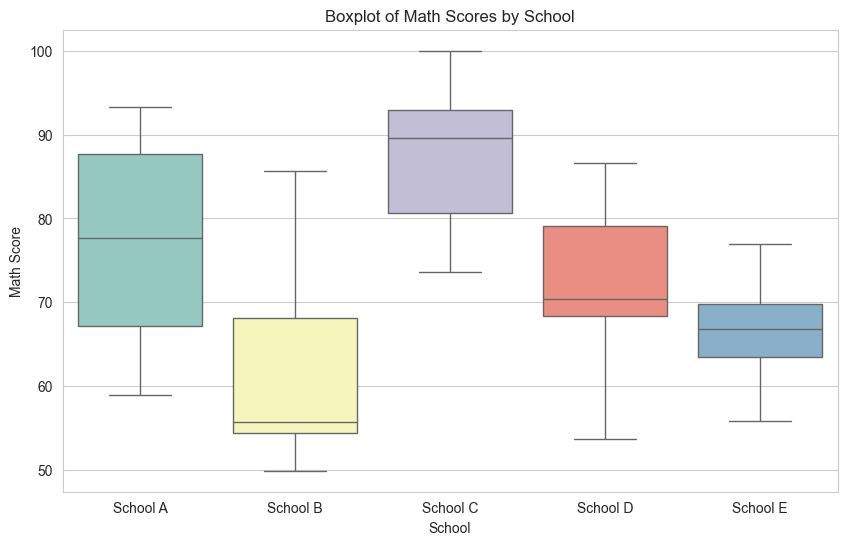

In [66]:
## Import Libraries ##
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data ##

math = pd.read_excel("math_scores.xlsx")

## Evaluate Data Integrity ##

print(math.head())
print(math.info())

## Calculate Means and SDs by School ##

school_stats = math.groupby('School')['MathScore'].agg(['mean', 'std']).reset_index()
print(school_stats)

## Visualize Data using Boxplots ##

sns.set_style("whitegrid") # Use a clean background

plt.figure(figsize=(10, 6))

sns.boxplot(x='School', y='MathScore', data=math, palette='Set3')
plt.title('Boxplot of Math Scores by School')
plt.xlabel('School')
plt.ylabel('Math Score')
plt.show()


- As we can see from the summary statistics, the mean math scores of students in School A and C are meaningfully greater than those in B, D, and E from a contextual perspective (e.g., moving from a C-D grade level to a B-C grade level).

- In the boxplot, we see that School C has the greatest mean scores and School B has the least mean scores, but all of the other groups exhibit some degree of overlap.

- Now let's move into our model building. Here, since we are working with random effects, we're going to use a new function from the `statsmodels` library called `mixedlm`:

In [67]:
## Import mixedlm function ##
from statsmodels.formula.api import mixedlm

## Fit Random Effects Model ##
model = mixedlm("MathScore ~ 1", data=math, groups=math["School"])
result = model.fit()
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MathScore
No. Observations: 50      Method:             REML     
No. Groups:       5       Scale:              98.7858  
Min. group size:  10      Log-Likelihood:     -188.6593
Max. group size:  10      Converged:          Yes      
Mean group size:  10.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    72.843    4.493 16.214 0.000 64.038 81.648
Group Var    91.041    7.492                           



- We can (and should) check all of our relevant assumptions just like we have done in the past, but we won't go through those steps here for brevity.

- I will say, though, your main two that you check here are:

1. Normality (as usual)
2. Constant Variance (using B-P test and standardized residuals vs the groups...so kind of like a boxplot but with residuals)
    - This is doing something similar to what we've done before except now we're eliminating the possibility of confounding our residuals by group effects. In theory, the random effects and the residuals should be independent, and this visualization will assess this. Interestingly, this is also exactly how the B-P test works!

- Going back to the results table, you can see that the results look a little different than our typical ANOVA table. For us to obtain the p-value associated with our aforementioned statistical hypotheses, we need to fit a reduced model (without the random effect) and compare it to the full model (with the random effect).

- Let's check it out:

In [68]:
## Fit the reduced model ##
red_mod = ols('MathScore ~ 1', data=math).fit()
print(red_mod.summary())

## Perform Likelihood Ratio Test ##
lr_stat = 2 * (result.llf - red_mod.llf)
from scipy.stats import chi2
p_value = 0.5 * (1 - chi2.cdf(lr_stat, df=1))
print(f"Likelihood Ratio Test Statistic: {lr_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("Significant variability among schools (reject H0)")
else:
    print("No significant variability among schools (fail to reject H0)")

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 11 Nov 2025   Prob (F-statistic):                nan
Time:                        10:36:12   Log-Likelihood:                -199.29
No. Observations:                  50   AIC:                             400.6
Df Residuals:                      49   BIC:                             402.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8430      1.861     39.149      0.0

- Our Likelihood Ratio (LR) test statistic is 21.26 with an associated p-value of less than 0.0001.

- This suggests that our data are more strongly supportive of the full model (with the random effect) than the reduced model (without the random effect).

- In other words, we have strong evidence to suggest that $\sigma^2_a > 0$.

- Let's extract the variance components from the full model to estimate $\sigma^2_a$ and $\sigma^2$:

In [69]:
## Estimate Variance Components ##

var_components = result.cov_re
residual_var = result.scale
print(f"Variance Components:\n{var_components}\nResidual Variance: {residual_var}")

Variance Components:
           Group
Group  91.041232
Residual Variance: 98.78582169483812


- The estimated variance component for the random effect (school) is 91.04 (SD = 9.54) and the estimated variance component for the residuals is 98.79.

- What this tells us is, on average, schools' math scores vary by about 9.54 points from the overall mean math score due to differences between schools.

    - This is nearly a full letter grade difference in math scores, which is quite contextually meaningful!!

- Because we aren't interested in the specific schools, we won't perform any post-hoc tests here.

## Mixed Effects Models: A Brief Introduction

- So far, we have only discussed random effects models with one random factor and how that changes our typical one-way ANOVA setup.

- As you can imagine, there are many scenarios where we might have both fixed and random factors in the same experiment.

- For example, suppose we wanted to compare mean math scores in a particular content area among students in different schools while controlling for the effect of different teachers (suppose we work for a educational curriculum company and we've hired four traveling teachers to teach a specific math lesson in each school to different students).

- Here, we might be interested in comparing the mean math scores across different, specific schools (fixed effect) while controlling for the variability introduced by different, random teachers (random effect).

- This type of model is called a **mixed effects model** because it contains both fixed and random effects.

- The model structure would look like this:

$$ y_{ijk} = \mu + \alpha_i + b_j + \epsilon_{ijk} $$

where:

- $y_{ijk}$ = the $k^{th}$ observation from the $i^{th}$ level of the fixed factor and the $j^{th}$ level of the random factor,
- $\mu$ = the overall mean,
- $\alpha_i$ = the fixed effect of the $i^{th}$ level of the fixed factor,
- $b_j$ = the random effect of the $j^{th}$ level of the random factor, and
- $\epsilon_{ijk}$ = the error term.

- Note that:
$$\begin{align*} b_j &\sim N(0, \sigma_b^2) \\ \epsilon_{ijk} &\sim N(0, \sigma^2) \end{align*} $$

- Moreover, our statistical hypotheses are also now mixed:

$$ \begin{align*} &H_{01}: \alpha_1 = \alpha_2 = ... = \alpha_a \\ 
                  &H_{11}: \text{At least one } \alpha_i \text{ is different} \\
                  &H_{02}: \sigma^2_b = 0 \\
                  &H_{12}: \sigma^2_b > 0
   \end{align*}
   $$

- The analysis of mixed effects models is similar to that of random effects models, but with some additional considerations for the fixed effects.

- We can use the same `mixedlm` function from the `statsmodels` library to fit mixed effects models, just as before.

- With the data contained in the `mixed_effects_math_scores.xlsx` file, we can fit a mixed effects model with school as a fixed effect and teacher as a random effect.


     School Teacher  Replication  MathScore
0  School_A      T1            1  75.581936
1  School_A      T1            2  75.582035
2  School_A      T1            3  86.462134
3  School_A      T1            4  81.591465
4  School_A      T1            5  74.170010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       180 non-null    object 
 1   Teacher      180 non-null    object 
 2   Replication  180 non-null    int64  
 3   MathScore    180 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ KB
None
      School Teacher       mean       std
0   School_A      T1  75.169722  5.490413
1   School_A      T2  73.066392  5.684505
2   School_A      T3  75.972509  5.459996
3   School_A      T4  79.997719  5.172713
4   School_B      T1  83.717662  6.292885
5   School_B      T2  79.072108  5.187221
6   School_B      T

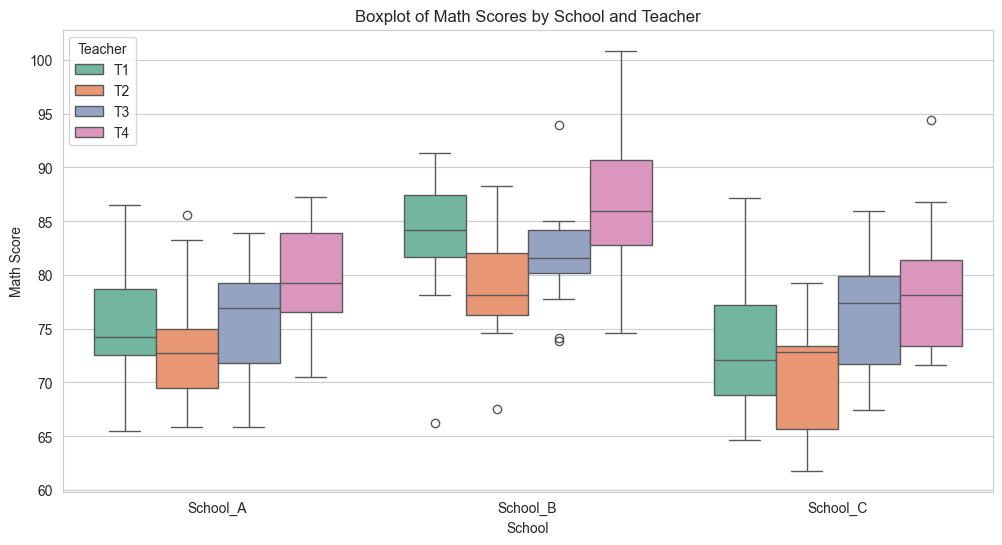

In [70]:
## Import the Data ##

math2 = pd.read_excel("mixed_effects_math_scores.xlsx")

## Evaluate Data Integrity ##

print(math2.head())
print(math2.info())

## Run Exploratory Data Analysis ##

## Calculate Means and SDs by School and Teacher ##

school_teacher_stats = math2.groupby(['School', 'Teacher'])['MathScore'].agg(['mean', 'std']).reset_index()
print(school_teacher_stats)

## Visualize Data using Boxplots ##

sns.set_style("whitegrid") # Use a clean background
plt.figure(figsize=(12, 6))
sns.boxplot(x='School', y='MathScore', hue='Teacher', data=math2, palette='Set2')
plt.title('Boxplot of Math Scores by School and Teacher')
plt.xlabel('School')
plt.ylabel('Math Score')
plt.legend(title='Teacher')
plt.show()


- Looking at these reseults, it seems like School B tends to perform better, on average, than the other schools.

    - This gives us some evidence in favor of $H_{11}$.

- Additionally, it seems like teacher 2 was consistently yielding the lowest scores across all schools.

    - This gives us some evidence in favor of $H_{12}$.

- To formally test these hypotheses, we can fit reduced models and compare them to the full model using likelihood ratio tests, just like before.

In [71]:
## Fit the Full Mixed Effects Model ##

mixed_mod = mixedlm("MathScore~School",data=math2, groups=math2["Teacher"])
mixed_result = mixed_mod.fit(reml=False,method='nm') # Fit using ML for comparison

## Fit the Reduced Model (Note this is keeping the fixed effect) ##

reduced_mod = ols('MathScore ~ School', data=math2).fit()

## Perform Likelihood Ratio Test ##

ll_full = mixed_result.llf
ll_reduced = reduced_mod.llf

LR_stat = 2 * (ll_full - ll_reduced)
p_value = 0.5 * (1 - chi2.cdf(LR_stat, df=1))
print(f"Likelihood Ratio Test Statistic: {LR_stat}, p-value: {p_value}")

## Perform test for fixed effect ##

print(mixed_result.summary())



Likelihood Ratio Test Statistic: 23.66386928904285, p-value: 5.735807963036521e-07
            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   MathScore
No. Observations:   180       Method:               ML       
No. Groups:         4         Scale:                32.0100  
Min. group size:    45        Log-Likelihood:       -571.9619
Max. group size:    45        Converged:            Yes      
Mean group size:    45.0                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          76.052    1.462 52.022 0.000 73.186 78.917
School[T.School_B]  6.740    1.033  6.525 0.000  4.716  8.765
School[T.School_C] -1.041    1.033 -1.008 0.313 -3.066  0.983
Group Var           6.415    0.901                           



- Let's start with the random effect (teacher):

    - The LR test statistic is 23.66 with an associated p-value much less than 0.05.
    - This suggests that we have strong evidence to suggest that $\sigma^2_b > 0$.

- Now, let's test the fixed effect (school):

    - Here, the table of coefficients output to us via the `summary` function yields information similar to that we would generally expect from a linear regression model.
    - This is because fixed effects can be interpreted similarly to regression coefficients as they are mathematically equivalent. 
    - Here, we don't see School A because schools are coded using dummy variables and School A is the reference group.
    - Looking at the p-values associated with each school, we see that only School B has a p-value less than 0.05.
    - This suggests that only School B has a mean math score that is significantly different from School A.
    - And furthermore, it suggests that the data more strongly support $H_{11}$ seeing as at least one school (School B) has a mean math score that is significantly different from the others.

## What about Post-Hoc Tests?

- We had said that in a one-way random effects model, we wouldn't generally care to do a post-hoc test because we aren't interested in the specific levels of the random factor.

- However, what about in a mixed effects model where the fixed effect (which is probably our treatment effect) has a significant result and more than two levels?

- In classical ANOVA (assuming fixed effects), we use Tukey’s HSD because the residual variance is shared and homoscedastic.

- In mixed models, we instead compare estimated marginal means from the fitted model, using multiple-comparison corrections for the p-values.

- This gives a functionally equivalent test of which schools differ, while respecting the random effect structure.

- In R, we could use the `emmeans` package to do this. However, Python (to my knowledge) does not have a built-in function to do this. So if we wanted to run post-hoc tests in Python, we would need to manually calculate the estimated marginal means and then perform pairwise comparisons with multiple-comparison corrections.

- Here is an example of how to do so below:

In [72]:
from statsmodels.stats.multitest import multipletests
from itertools import combinations

# Get estimated marginal means (group means after controlling for random effects)
means = math2.groupby('School')['MathScore'].mean()

# Prepare all pairwise comparisons
pairs = list(combinations(means.index, 2))
cov = mixed_result.cov_params()
comparisons = []

for a, b in pairs:
    # Estimate difference and its standard error
    est_diff = mixed_result.params[f'School[T.{b}]'] - (mixed_result.params.get(f'School[T.{a}]', 0))
    
# Compute SE for difference
    var_a = cov.loc[f'School[T.{b}]', f'School[T.{b}]']
    var_b = cov.loc[f'School[T.{a}]', f'School[T.{a}]'] if f'School[T.{a}]' in cov.index else 0
    se = np.sqrt(var_a + var_b)
    
    # t-value and p-value
    t_value = est_diff / se
    df_resid = mixed_result.df_resid
    p_value = 2 * (1 - stats.t.cdf(abs(t_value), df_resid))
    
    comparisons.append({'Contrast': f'{b} - {a}', 'Diff': est_diff, 'SE': se, 'p': p_value})

# Adjust for multiple comparisons
comparisons_df = pd.DataFrame(comparisons)
comparisons_df['p_adj'] = multipletests(comparisons_df['p'], method='holm')[1]
comparisons_df['Significant'] = comparisons_df['p_adj'] < 0.05
print(comparisons_df)

              Contrast      Diff        SE             p         p_adj  Significant
0  School_B - School_A  6.740478  1.032956  6.893466e-10  2.068040e-09         True
1  School_C - School_A -1.041182  1.032956  3.148482e-01  3.148482e-01        False
2  School_C - School_B -7.781660  1.460821  3.006935e-07  6.013871e-07         True


- Here we can see that School B is significantly greater than School A and School C.

- However, Schools A and C are not significantly different from each other.

## Conclusion

- In this module, we discussed random factors and how they differ from fixed factors.

- We discussed one-factor random effects models and mixed effects models, which contain both fixed and random factors.

- We also discussed how to perform data analysis using these models and how to interpret the results.

- Finally, we touched on post-hoc tests in mixed effects models.

- As you can see, random factors and mixed effects models are powerful tools applicable in many experimental designs.

- However, extreme care must be taken when specifying and interpreting these models, as they can be quite complex.